## Importing Dependencies

In [2]:
import os
import gridstatusio
import pandas as pd
import numpy as np
from collections import Counter

# Visualization

import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
client = gridstatusio.GridStatusClient(api_key = "5e0391172219409e84c5b013357458aa")

## Loading data

In [6]:
ISO = "nyiso"
START = "Jul 1, 2023"
END = "Aug 1, 2023"

df = client.get_dataset(
    dataset=f"{ISO}_load_raw",
    start=START,
    end=END,
    tz="GMT",
)

Fetching Page 1...Done in 0.97 seconds. 

Total number of rows: 9085


## Descriptive analysis

In [23]:
df.head()

,load,capitl,centrl,dunwod,genese,hud_vl,longil,mhk_vl,millwd,nyc,north,west
time_local,,,,,,,,,,,,
2023-07-01 00:00:00+00:00,21719.9781,1684.8364,2142.5889,822.4161,1316.8333,1503.5210,3289.5884,1019.9258,417.6803,6792.3413,638.1467,2092.0999
2023-07-01 00:05:00+00:00,21625.9403,1696.0559,2135.0908,820.2476,1310.3699,1474.4135,3276.9062,1018.0216,412.6833,6750.4630,644.4270,2087.2615
2023-07-01 00:10:00+00:00,21596.3057,1671.9813,2148.7227,800.4192,1302.8622,1523.6902,3268.3884,1013.3822,402.7295,6739.1133,642.4797,2082.5370
2023-07-01 00:15:00+00:00,21469.0323,1676.3162,2099.5390,823.5942,1302.6343,1499.2502,3267.7260,1007.4002,392.3756,6684.3730,637.2401,2078.5835
2023-07-01 00:20:00+00:00,21412.0348,1678.6174,2122.7920,819.2205,1300.0626,1465.3452,3220.0469,1013.3581,415.1738,6673.0957,633.3353,2070.9873


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9085 entries, 2023-07-01 00:00:00+00:00 to 2023-07-31 23:55:00+00:00
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   load    9085 non-null   float64
 1   capitl  9085 non-null   float64
 2   centrl  9085 non-null   float64
 3   dunwod  9085 non-null   float64
 4   genese  9085 non-null   float64
 5   hud_vl  9085 non-null   float64
 6   longil  9085 non-null   float64
 7   mhk_vl  9085 non-null   float64
 8   millwd  9085 non-null   float64
 9   nyc     9085 non-null   float64
 10  north   9085 non-null   float64
 11  west    9085 non-null   float64
dtypes: float64(12)
memory usage: 922.7 KB


In [27]:
df.describe()

,load,capitl,centrl,dunwod,genese,hud_vl,longil,mhk_vl,millwd,nyc,north,west
count,9085.000000,9085.000000,9085.000000,9085.000000,9085.000000,9085.00000,9085.000000,9085.000000,9085.000000,9085.000000,9085.000000,9085.000000
mean,21021.604058,1502.773982,1856.490034,816.444930,1196.707896,1316.08897,3264.677704,877.551474,408.540012,7289.992620,631.935421,1860.401015
std,3312.899419,243.597631,263.337702,157.282512,201.902070,271.16640,715.950790,140.985300,94.458545,1104.287393,32.727648,264.249549
min,14577.855200,1025.539600,1315.306200,502.981300,788.413000,826.18390,1908.178100,579.597600,210.178800,4860.989300,379.225200,1214.185000
25%,18273.381800,1311.817600,1643.866500,688.481600,1035.427700,1091.53880,2649.437300,761.572800,330.311000,6398.255000,609.089900,1635.597400
50%,21031.995800,1479.941700,1844.262800,810.269100,1183.202000,1283.54300,3222.223100,865.667100,399.530800,7247.556600,632.415900,1857.479100
75%,23568.251000,1688.019500,2053.110400,929.398200,1330.184300,1514.56870,3807.312500,982.917200,477.822800,8159.851000,656.658500,2078.181600
max,28953.146200,2110.397500,2613.102800,1248.379800,1763.403100,2065.75220,4981.760300,1329.167700,657.839700,10093.441000,715.088300,2504.783200


## Timeseries Preprocessing steps

 Coverting datetime object to Index:
   1. Easily slice df based on date and time2
   2. Joining two databases becomes straightforward.

In [20]:
df.set_index('time_local',inplace=True)

<AxesSubplot:title={'center':'xyz'}, xlabel='time_local'>

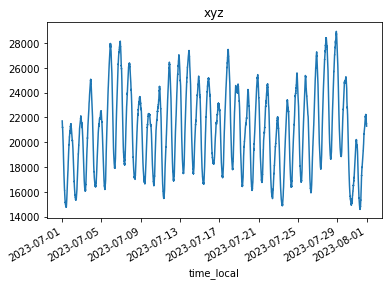

In [31]:
df['load'].plot(title = "xyz")